#### Preprocessing CIFAR10 dataset

In [81]:
import torch
import torchvision
import pickle
# Download and load the training dataset
#trainset = torchvision.datasets.CIFAR10(root='./cifar/train', train=True, download=True)
with open("/data/rech/huiyuche/bgpt_2/cifar/train/cifar-10-batches-py/data_batch_1", 'rb') as fo:
    dict = pickle.load(fo, encoding = 'latin-1')
print(dict["data"][0])


[ 59  43  50  68  98 119 139 145 149 149 131 125 142 144 137 129 137 134
 124 139 139 133 136 139 152 163 168 159 158 158 152 148  16   0  18  51
  88 120 128 127 126 116 106 101 105 113 109 112 119 109 105 125 127 122
 131 124 121 131 132 133 133 123 119 122  25  16  49  83 110 129 130 121
 113 112 112 106 105 128 124 130 127 122 115 120 130 131 139 127 126 127
 130 142 130 118 120 109  33  38  87 106 115 117 114 105 107 121 125 109
 113 146 133 127 118 117 127 122 132 137 136 131 124 130 132 135 130 125
 121  94  50  59 102 127 124 121 120 114 107 125 129 106 108 124 121 108
  98 110 117 120 134 140 131 141 135 127 121 119 103  87  75  67  71  84
 110 129 136 131 129 119 108 122 123 105 107 111 108  98  94  97  83  88
 102  97  88 118 140 136 120 107  88  67  35  32  97 111 123 130 136 132
 122 121 127 138 124 120 107  80  68  74 101 105  65  58  63  78 136 122
 139 151 129 108  95  96  89  66 115 119 130 140 133 127 138 137 131 133
 134 108  72  51  41  72 181 209 125  68  64  82 12

#### Preprocessing AgNews

In [ ]:
import pandas as pd

# Path to your .parquet file
file_path = '/data/rech/huiyuche/bgpt_2/ag_news/train/train-00000-of-00001.parquet'

# Load the file into a DataFrame
df = pd.read_parquet(file_path)

df = df.sample(n=1000, random_state=42)
# Display the data
print(df.head())
print(df.shape)


# iterate over text column. save each text to a file called '{index}.txt'

for index, row in df.iterrows():
    with open(f'/data/rech/huiyuche/bgpt_2/ag_news/train/{index}.txt', 'w', encoding= "utf-8") as f:
        f.write(row['text'])

# print the average of the length of the text column
print(df['text'].apply(len).mean())

#### BFD & Corr

In [99]:
from utils import *
import os
import sys
import importlib
importlib.reload(sys.modules['utils'])
from utils import *

In [100]:

ByteFrequencyDistribution().get_BFD_Corr_plots(
    "txt",
    "/data/rech/huiyuche/bgpt_2/ag_news/train",
    "plots"
)


In [101]:
ByteFrequencyDistribution().get_BFD_Corr_plots(
    "png",
    "/data/rech/huiyuche/bgpt_2/cifar/train",
    "plots"
)

In [103]:
ByteFrequencyDistribution().get_BFD_Corr_plots(
    "flac",
    "/data/rech/huiyuche/bgpt_2/librispeech8K/train/LibriSpeech/dev-clean",
    "plots",
    threshold=1
)

In [63]:
corr, corr_new, average_byte_frequency_table = ByteFrequencyDistribution().get_fingerprint_by_folder("/data/rech/huiyuche/bgpt_2/cifar/train")

In [17]:
corr, corr_new, BFD = ByteFrequencyDistribution().get_fingerprint_by_folder("/data/rech/huiyuche/bgpt_2/ag_news/train")

['19240.txt', '35420.txt', '866.txt', '103248.txt', '7067.txt', '108476.txt', '88548.txt', '83145.txt', '55646.txt', '93689.txt', '1002.txt', '18987.txt', '95304.txt', '25087.txt', '71000.txt', '29618.txt', '116167.txt', '54159.txt', '16398.txt', '2110.txt', '86744.txt', '57662.txt', '65397.txt', '114559.txt', '34267.txt', '16785.txt', '82247.txt', '93534.txt', '106606.txt', '86164.txt', '68265.txt', '85071.txt', '58551.txt', '114988.txt', '72881.txt', '43690.txt', '55139.txt', '100908.txt', '71365.txt', '59654.txt', '68720.txt', '593.txt', '106440.txt', '93817.txt', '107358.txt', '67930.txt', '116888.txt', '72038.txt', '16264.txt', '16605.txt', '65445.txt', '26302.txt', '100501.txt', '27123.txt', '62338.txt', '10744.txt', '80670.txt', '7696.txt', '62371.txt', '74068.txt', '62066.txt', '201.txt', '88618.txt', '6359.txt', '102052.txt', '69990.txt', '49493.txt', '104858.txt', '111992.txt', '53321.txt', '32184.txt', '9286.txt', '40471.txt', '13664.txt', '114609.txt', '10317.txt', '109424.

In [18]:
# transform corr (a dataframe) to numpy array
import numpy as np
np.set_printoptions(threshold=np.inf)
corr_np = corr.to_numpy()
print(np.isnan(corr_np).sum())
corr.fillna(-0.5, inplace=True)

58975


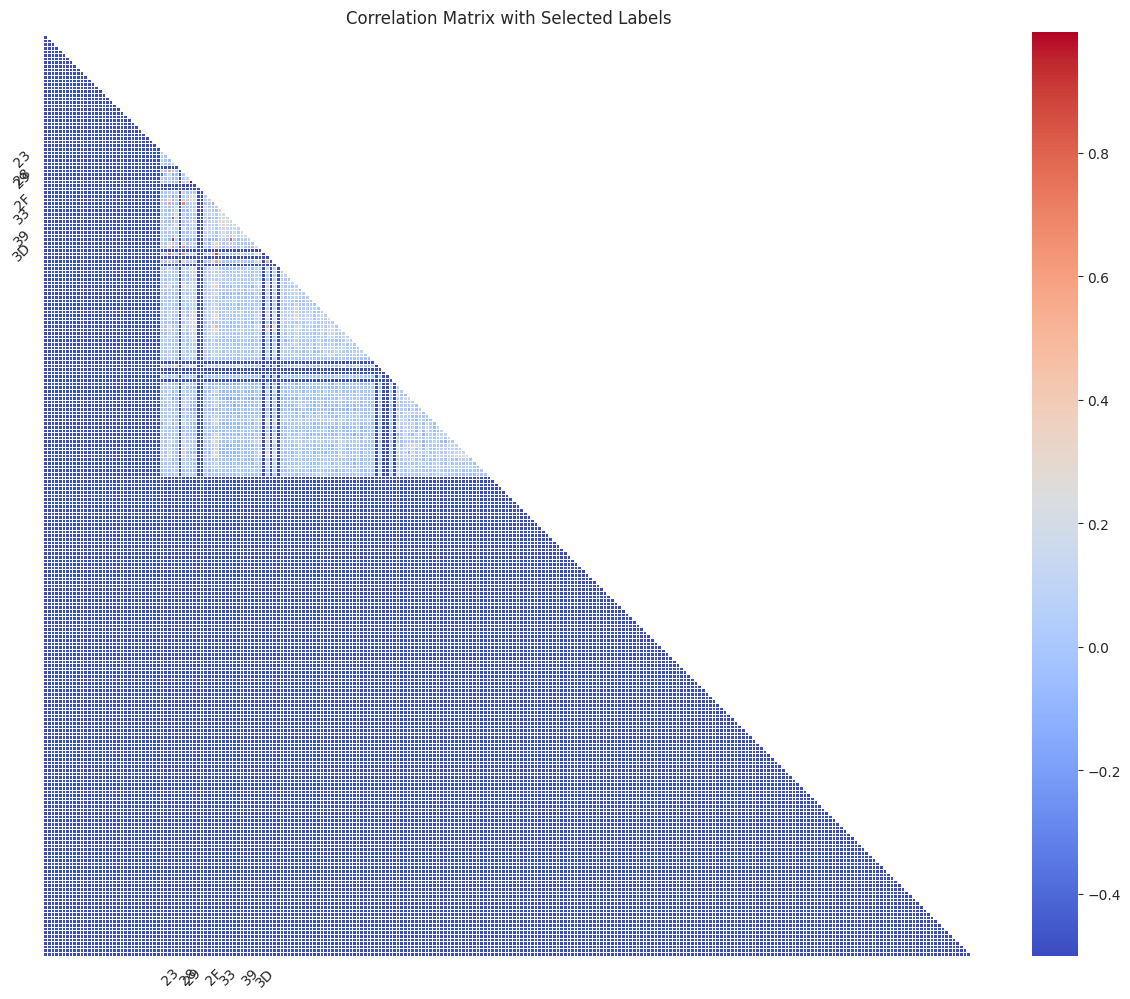

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# all values > 0.5 
result = [(column, index) for column in upper.columns for index in upper.index if upper[column][index] > 0.7]


# variable names
variable_names = set([name for pair in result for name in pair])

#  get all ticks positions
all_ticks = np.arange(len(corr.columns))

#  only keep the ticks of variables with correlation > 0.5
filtered_ticks = [i for i, col in enumerate(corr.columns) if col in variable_names]

# Only display labels greater than 0.5, and set other labels to empty strings
xticks_labels = ['' if i not in filtered_ticks else corr.columns[i] for i in all_ticks]
yticks_labels = ['' if i not in filtered_ticks else corr.index[i] for i in all_ticks]


# generate a plot with fixed size: 15*12
plt.figure(figsize=(15,12))


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# Draw the heatmap with the mask and correct aspect ratio
plt.title('Correlation Matrix with Selected Labels')
plt.xticks(ticks=all_ticks, labels=xticks_labels, rotation=45)
plt.yticks(ticks=all_ticks, labels=yticks_labels, rotation=45)
plt.show()





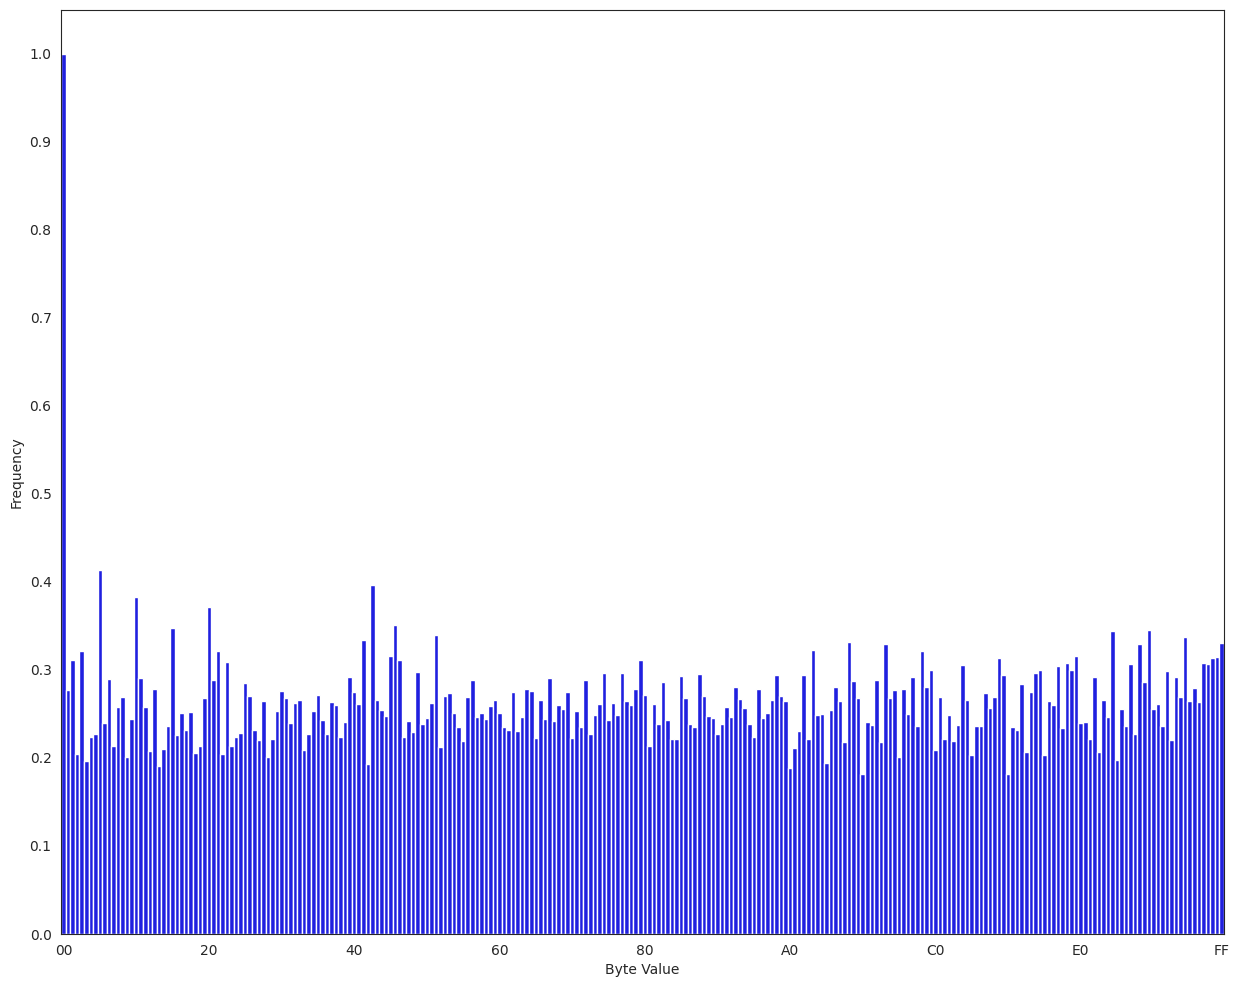

In [70]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
plt.figure(figsize=(15,12))
df = pd.DataFrame(list(average_byte_frequency_table.items()), columns=['Byte Value', 'Frequency'])
df_copy = df.copy(deep=True)
df_copy["Byte Value"] =pd.Categorical(df["Byte Value"], categories=df["Byte Value"].unique(), ordered=True)
sns.barplot(
        x='Byte Value',              # x-axis represents byte values (from 00 to FF)
        y='Frequency',         # y-axis represents their corresponding frequency in percentage
        data=df_copy,               # data source is our DataFrame created from the frequency table
        width=1,
        color='blue',           # color of the bars

    )

# Define the specific x-ticks you want to show (e.g., 1, 32, 64, etc.)
xticks = list(range(0,256,32)) + [255]

# Set the x-ticks as well as y-ticks to only show those values
plt.xticks(ticks=xticks)
plt.yticks(ticks=list(np.arange(0, 1.01, 0.1)))


# set y axis to log scale
# plt.yscale('log')
plt.show()



In [89]:
from mutagen.flac import FLAC

# Load the .flac file
total_duration = 0
for file in os.listdir("/data/rech/huiyuche/bgpt_2/librispeech8K/train/LibriSpeech/dev-clean/"):
    if file.endswith(".flac"):
        audio = FLAC(f"/data/rech/huiyuche/bgpt_2/librispeech8K/train/LibriSpeech/dev-clean/{file}")

        # Get the duration in seconds
        duration_in_seconds = audio.info.length
        total_duration += duration_in_seconds

average_duration = total_duration / 2703



In [90]:
print(average_duration)

7.175775342212348


# Embedding Analysis

#### Hyperparameters

In [1]:

PATCH_NUM_LAYERS = 12
BYTE_NUM_LAYERS = 3
PATCH_LENGTH = 512
PATCH_SIZE = 16
PATCH_SAMPLING_BATCH_SIZE = 0
HIDDEN_SIZE = 768
INFERENCE_WEIGHTS_PATH = "/data/rech/huiyuche/huggingface/bgpt/weights-text.pth"
print(INFERENCE_WEIGHTS_PATH)

/data/rech/huiyuche/huggingface/bgpt/weights-text.pth


#### Str_to_bytes

In [23]:
def content_2_bytes(ext, content, PATCH_SIZE, PATCH_LENGTH, temp_dir = "./temp_dir"):

    with open(f"{temp_dir}/temp.{ext}", "w", encoding = "utf-8" ) as f:
        # if ext = "txt", write using utf-8 encoding
        if ext == "txt":
            f.write(content)
    
    ext_byte_array = bytearray(ext, 'utf-8')
    ext_byte_array = [byte for byte in ext_byte_array][:PATCH_SIZE]

    with open(f"{temp_dir}/temp.{ext}", 'rb') as f:
        file_bytes = f.read()

    bytes = []
    for byte in file_bytes:
        bytes.append(byte)

    # padding. For each patch, if do not have enough bytes, pad with 256.
    if len(bytes)%PATCH_SIZE!=0:
        bytes = bytes + [256] * (PATCH_SIZE - len(bytes) % PATCH_SIZE)

    bos_patch = ext_byte_array + [256] * (PATCH_SIZE - len(ext))
    # 1. also add a bos patch at the beginning, as in inference.
    bytes = bos_patch + bytes

    # random slice...
    if len(bytes) > PATCH_LENGTH*PATCH_SIZE:
        effective_patches_num = PATCH_LENGTH + 1
        if SHOW_WARNS:
            warnings.warn(f"Warning: {filename} is too long, truncating to {PATCH_LENGTH*PATCH_SIZE} bytes.")
        choices = ["head", "body", "tail"]
        choice = random.choice(choices)
        if choice == "head":
            bytes = bytes[:PATCH_LENGTH*PATCH_SIZE]
        elif choice == "body" and len(bytes) > (PATCH_LENGTH+1)*PATCH_SIZE:
            start = random.randint(1, len(bytes)//PATCH_SIZE-PATCH_LENGTH)
            bytes = bytes[start*PATCH_SIZE:(start+PATCH_LENGTH)*PATCH_SIZE]
        else:
            bytes = bytes[-PATCH_LENGTH*PATCH_SIZE:]

    masks = [1] * (len(bytes)//PATCH_SIZE)

    return bytes, masks

#### load model

In [2]:

import os
import time
import torch
import importlib
import sys
from model import bGPTLMHeadModel
from transformers import GPT2Config
if torch.cuda.is_available():    
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

patch_config = GPT2Config(
    num_hidden_layers=PATCH_NUM_LAYERS, 
    max_length=PATCH_LENGTH, 
    max_position_embeddings=PATCH_LENGTH,
    hidden_size=HIDDEN_SIZE,
    n_head=HIDDEN_SIZE//64,
    vocab_size=1)   

byte_config = GPT2Config(
    num_hidden_layers=BYTE_NUM_LAYERS, 
    max_length=PATCH_SIZE+1, 
    max_position_embeddings=PATCH_SIZE+1,
    hidden_size=HIDDEN_SIZE,
    n_head=HIDDEN_SIZE//64,
    vocab_size=256+1) # vocal size is all possible values of a byte plus 1 for eos.

model = bGPTLMHeadModel(patch_config, byte_config, PATCH_SIZE, PATCH_SAMPLING_BATCH_SIZE)
print("Parameter Number: "+str(sum(p.numel() for p in model.parameters() if p.requires_grad)))

checkpoint = torch.load(INFERENCE_WEIGHTS_PATH, map_location=torch.device(device))
model.load_state_dict(checkpoint['model'])
model = model.to(device)
model.eval()
patch_level_decoder = model.patch_level_decoder
print(4)

/data/rech/huiyuche/envs/bgpt/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Parameter Number: 110084352
4


In [25]:
test_string = "Today is a good day. So it is a good choice for me to go out for a walk."
byte_array, _ = content_2_bytes("txt", test_string, PATCH_SIZE, PATCH_LENGTH)
print(byte_array)
# convert to tensor, to cuda
byte_array = torch.tensor([byte_array]).to(device)
print(byte_array.shape)
print(len(byte_array))
patch_array = byte_array.reshape(len(byte_array), -1, PATCH_SIZE)
with torch.no_grad():
    output = patch_level_decoder(patch_array)

last_hidden_state = output["last_hidden_state"]


[116, 120, 116, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 84, 111, 100, 97, 121, 32, 105, 115, 32, 97, 32, 103, 111, 111, 100, 32, 100, 97, 121, 46, 32, 83, 111, 32, 105, 116, 32, 105, 115, 32, 97, 32, 103, 111, 111, 100, 32, 99, 104, 111, 105, 99, 101, 32, 102, 111, 114, 32, 109, 101, 32, 116, 111, 32, 103, 111, 32, 111, 117, 116, 32, 102, 111, 114, 32, 97, 32, 119, 97, 108, 107, 46, 256, 256, 256, 256, 256, 256, 256, 256]
torch.Size([1, 96])
1


In [26]:
print(last_hidden_state.shape)

torch.Size([1, 6, 768])


In [19]:
22616/4112

5.5

In [15]:
class a():
    def __init__(self, c):
        self.a = 1
        self.c = c
    def b(self):
        print(self.c)

a(2).b()

2
